# 世界各国乡村人口数据

In [36]:
import pandas as pd

# 读取CSV文件
file_path = "./data/世界各国乡村人口占总人口百分比.csv"
data = pd.read_csv(file_path)

# 显示数据的前几行
print(data.head())

          Country  1990  1991  1992  1993  1994  1995  1996  1997  1998  ...  \
0     Afghanistan  78.8  78.7  78.6  78.6  78.5  78.4  78.3  78.2  78.1  ...   
1         Albania  63.6  63.3  62.8  62.2  61.6  61.1  60.5    60  59.4  ...   
2         Algeria  47.9  47.1  46.3  45.6  44.8    44  43.2  42.5  41.7  ...   
3  American Samoa  19.1  18.1  17.2  16.3  15.5  14.7    14  13.2  12.5  ...   
4         Andorra   5.3   5.5   5.7   5.9   6.1   6.3   6.6   6.8   7.1  ...   

   2013  2014  2015  2016  2017  2018  2019  2020  2021  2022  
0  75.6  75.4  75.2    75  74.8  74.5  74.2    74  73.7  73.4  
1  44.6  43.6  42.6  41.6  40.6  39.7  38.8  37.9    37  36.2  
2  30.4  29.8  29.2  28.5  27.9  27.4  26.8  26.3  25.7  25.2  
3  12.7  12.7  12.8  12.8  12.8  12.8  12.9  12.8  12.8  12.8  
4  11.5  11.6  11.7  11.8  11.9  11.9    12  12.1  12.1  12.2  

[5 rows x 34 columns]


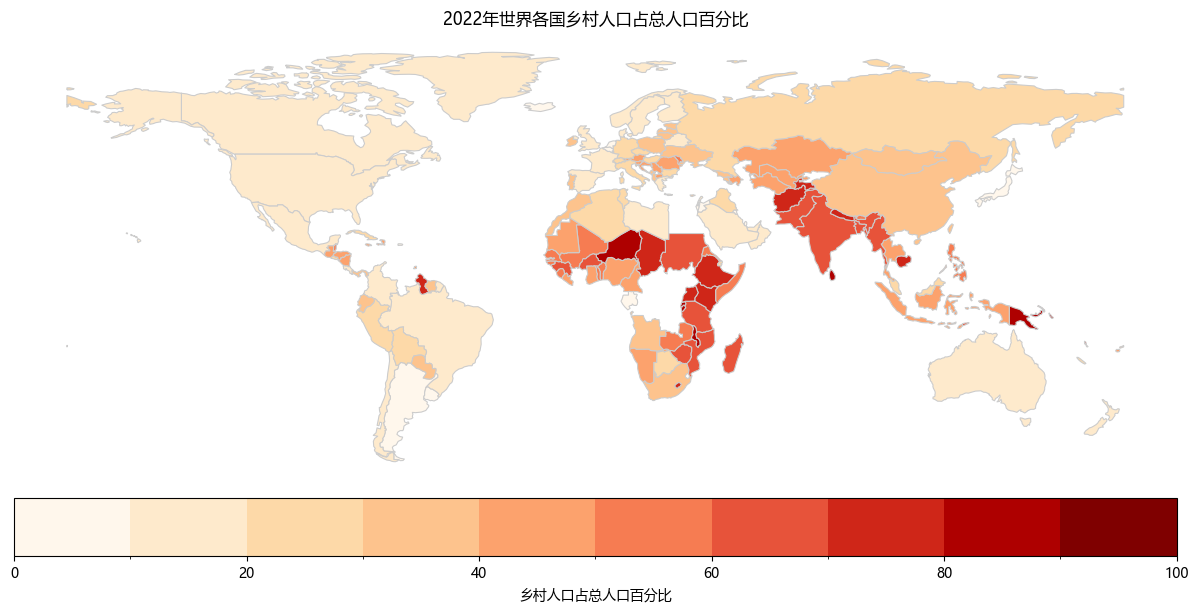

In [37]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# 设置中文字体
plt.rcParams['font.family'] = ['Microsoft YaHei']
import matplotlib.colors as mcolors


import geopandas as gpd


# 读取世界地图shapefile文件
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# 转换数据类型为数字
data['2022'] = pd.to_numeric(data['2022'], errors='coerce')

# 将数据集和地图合并
world = world.merge(data, how='left', left_on='name', right_on='Country')


# 创建边界规范化对象，将数据分成10个区间
norm = mcolors.BoundaryNorm(boundaries=range(0, 101, 10), ncolors=256)

# 绘制地图
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.plot(column='2022', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=False, norm=norm)

# 添加颜色条
sm = plt.cm.ScalarMappable(cmap='OrRd', norm=norm)
sm.set_array([])  # 空数组必需，否则将出现异常
cbar = plt.colorbar(sm, ax=ax, orientation='horizontal', pad=0.02)
cbar.set_label('乡村人口占总人口百分比')

# 设置颜色条的范围为0到100
sm.set_clim(0, 100)

# 隐藏坐标轴
ax.set_axis_off()

# 设置标题
ax.set_title('2022年世界各国乡村人口占总人口百分比')
plt.show()

In [38]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.animation import FuncAnimation

# 读取世界地图shapefile文件
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


# 将数据集和地图合并
world = world.merge(data, how='left', left_on='name', right_on='Country')

# 创建边界规范化对象，将数据分成10个区间
norm = mcolors.BoundaryNorm(boundaries=range(0, 101, 10), ncolors=256)

# 创建绘图函数
def plot_map(year):
    ax.clear()  # 清除之前的内容
    world.plot(column=str(year), cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=False, norm=norm)
    ax.set_axis_off()
    ax.set_title(f'{year}年世界各国乡村人口占总人口百分比')

    # 设置颜色条的范围为0到100
    sm.set_clim(0, 100)

# 创建动画
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
sm = plt.cm.ScalarMappable(cmap='OrRd', norm=norm)
sm.set_array([])  # 空数组必需，否则将出现异常
cbar = plt.colorbar(sm, ax=ax, orientation='horizontal', pad=0.02)
cbar.set_label('乡村人口占总人口百分比')

ani = FuncAnimation(fig, plot_map, frames=range(1990, 2023), interval=500)

# 保存动画为视频文件
ani.save('world_population_animation.mp4', writer='ffmpeg')

plt.close()


### 从乡村人口占总人口百分比历年（1990年-2022年）变化地图动画，可以看出：
1.欧澳城镇化率高

2.拉美、南亚反复在变化

3.中自从2008年后乡村人口占总人口百分比历年在降低


# 世界各国农业发展数据

In [43]:
import pandas as pd

# 读取 CSV 文件
file_path = "./data/农林渔业增加值数据（现价美元）.csv"
data = pd.read_csv(file_path)

# 显示数据的前几行
print(data.head())

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# 设置中文字体
plt.rcParams['font.family'] = ['Microsoft YaHei']

          Country 1990 1991 1992 1993 1994 1995              1996  \
0     Afghanistan   ..   ..   ..   ..   ..   ..                ..   
1         Albania   ..   ..   ..   ..   ..   ..  1,165,016,858.50   
2         Algeria   ..   ..   ..   ..   ..   ..                ..   
3  American Samoa   ..   ..   ..   ..   ..   ..                ..   
4         Andorra   ..   ..   ..   ..   ..   ..                ..   

             1997            1998  ...               2013               2014  \
0              ..              ..  ...   4,595,531,207.10   4,537,457,838.30   
1  712,413,087.90  732,872,453.00  ...   2,499,688,485.30   2,644,330,678.80   
2              ..              ..  ...  20,663,211,051.20  21,993,343,502.80   
3              ..              ..  ...                 ..                 ..   
4              ..              ..  ...      18,699,905.00      17,589,355.00   

                2015               2016               2017               2018  \
0   3,948,217,064.10   

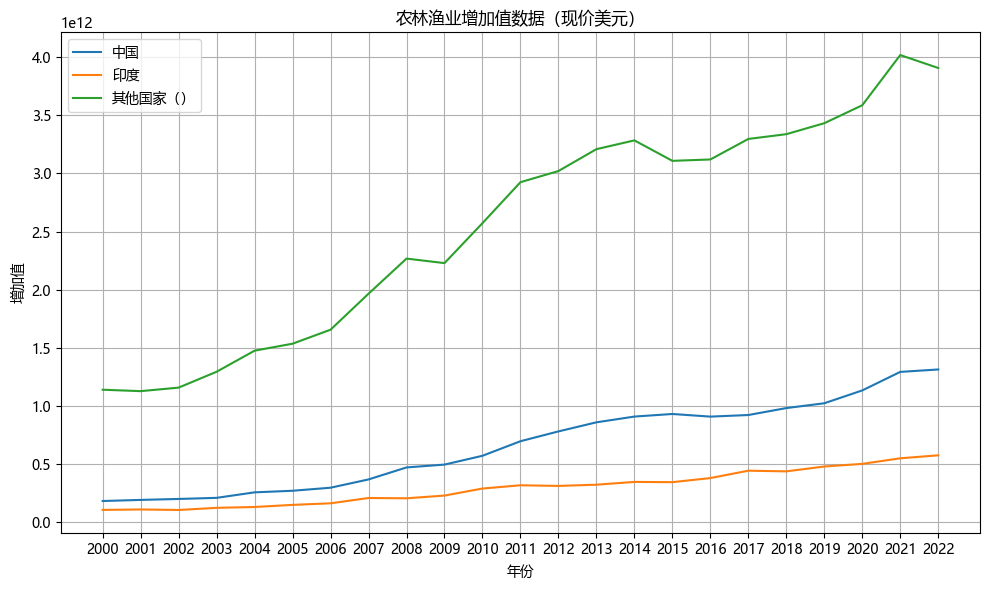

In [44]:


# 选择中国、印度和其他国家的数据
china_data = data[data['Country'] == 'China'].iloc[:, 1:].values.flatten()
india_data = data[data['Country'] == 'India'].iloc[:, 1:].values.flatten()
other_countries_data = data.drop(index=[0, 1]).iloc[:, 1:].astype(str).replace('..', '0').apply(lambda x: x.str.replace(',', '').astype(float)).sum().values

# 选择2000年到2022年的数据
years = data.columns[1:]
years = years[(years.astype(int) >= 2000) & (years.astype(int) <= 2022)]

# 将中国和印度的数据从字符串格式转换为数值格式
china_data = pd.Series(china_data).replace('..', '0').str.replace(',', '').astype(float)
india_data = pd.Series(india_data).replace('..', '0').str.replace(',', '').astype(float)

# 绘制折线图
plt.figure(figsize=(10, 6))
plt.plot(years, china_data[-len(years):], label='中国')
plt.plot(years, india_data[-len(years):], label='印度')
plt.plot(years, other_countries_data[-len(years):], label='其他国家（）')

# 添加标题和标签
plt.title('农林渔业增加值数据（现价美元）')
plt.xlabel('年份')
plt.ylabel('增加值')
plt.legend()

# 展示图形
plt.grid(True)
plt.tight_layout()
plt.show()



### 中国和印度作为农业大国，近年加一块约占其他国家的一半